1. Viết chương trình xử lý điểm ảnh

1.1 Biến đổi cường độ (image inverse tranformationtranformation)

[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


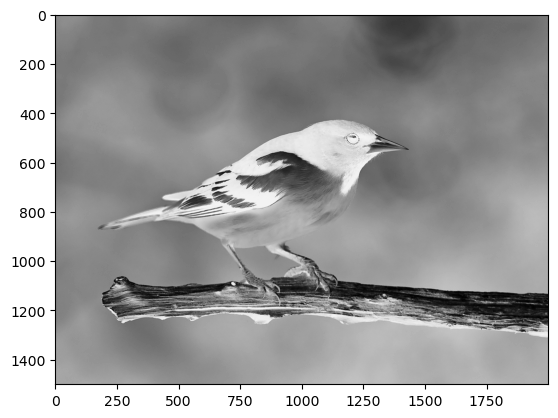

In [8]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#mở ảnh đen trắngtrắng
img = Image.open('bird.png').convert('L')

#Đảo ảnh dạng 'L' sang mã sốsố
im_1 = np.asarray(img)

#inversion operation
im_2 = 255 - im_1

#convert image 2 from ndarray to image
print(im_2)
new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img, cmap = 'gray')
plt.show()

1.2 Thay đổi chất lượng ảnh với power law (Gamma - Conrrection)


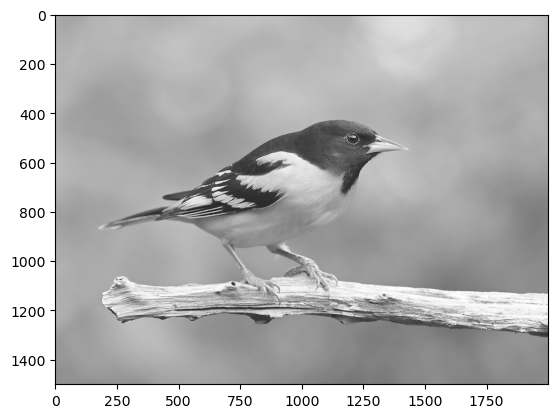

In [6]:
from PIL import Image 
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh ở chế độ xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng ndarray
im_l = np.asarray(img)

# Khởi tạo giá trị gamma
gamma = 0.5

# Chuyển kiểu dữ liệu từ int sang float
bl = im_l.astype(float)

# Tìm giá trị lớn nhất trong mảng bl
b2 = np.max(bl)

# Chuẩn hóa ảnh (tránh log(0) bằng cách cộng thêm 1)
b3 = (bl + 1) / b2

# Tính toán log và nhân với gamma (hàm mũ log gamma correction)
b4 = np.log(b3) * gamma

# Thực hiện hiệu chỉnh gamma
c = np.exp(b4) * 255.0

# Chuyển mảng float về kiểu uint8 (ảnh 8-bit)
cl = c.astype(np.uint8)

# Tạo ảnh mới từ mảng kết quả
d = Image.fromarray(cl)

# Hiển thị ảnh gốc
img.show()

# Hiển thị ảnh sau khi gamma correction
d.show()

# Hiển thị ảnh kết quả bằng matplotlib
plt.imshow(d, cmap='gray')
plt.show()


1.3 Thay đổi cường độ điểm ảnh với Log TransformationTransformation

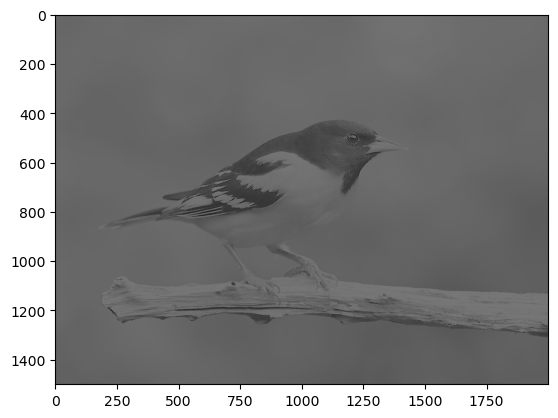

In [ ]:
from PIL import Image 
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh ở chế độ xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng ndarray
im_l = np.asarray(img)

# Khởi tạo giá trị gamma (trong trường hợp này không dùng, có thể bỏ)
gamma = 0.5

# Chuyển kiểu dữ liệu từ int sang float
bl = im_l.astype(float)

# Tìm giá trị lớn nhất trong mảng bl
b2 = np.max(bl)

# Thực hiện biến đổi logarit
c = (120.0 * np.log(1 + bl)) / np.log(1 + b2)

# Chuyển kết quả về kiểu int
cl = c.astype(int)

# Chuyển mảng cl thành ảnh
d = Image.fromarray(cl)

# Hiển thị ảnh gốc và ảnh sau khi biến đổi logarit
img.show()
d.show()
plt.imshow(d)
plt.show()


1.4 Histogram equalization

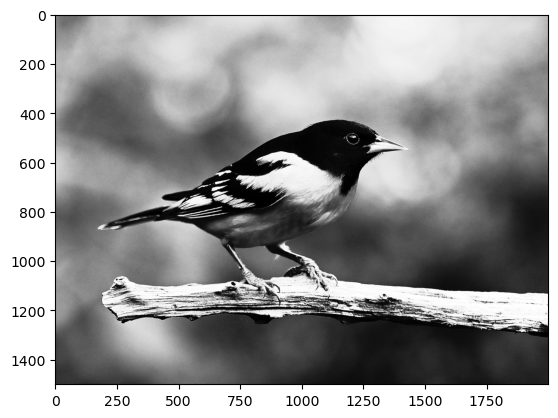

In [ ]:
from PIL import Image 
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh ở chế độ xám (grayscale)
img = Image.open('bird.png').convert('L')
# Chuyển ảnh sang mảng ndarray
iml = np.asarray(img)
# Làm phẳng (flatten) mảng 2D thành mảng 1D
bl = iml.flatten()
# Tính histogram và các khoảng bin
hist, bins = np.histogram(iml, 256, [0, 255])
# Tính hàm phân phối tích lũy (CDF)
cdf = hist.cumsum()
# Các giá trị CDF bằng 0 sẽ bị che (mask), phần còn lại được giữ lại trong cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)
# Thực hiện cân bằng lược đồ xám (histogram equalization)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
# Các giá trị bị che trong cdf_m được gán lại là 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# Gán các giá trị CDF cho mảng ảnh phẳng ban đầu
im2 = cdf[bl]
# im2 là mảng 1D nên cần chuyển lại thành mảng 2D theo kích thước gốc
im3 = np.reshape(im2, iml.shape)
# Chuyển mảng im3 thành ảnh để hiển thị
im4 = Image.fromarray(im3)
# Hiển thị ảnh gốc và ảnh sau khi cân bằng histogram
img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.show()


1.5 Thay đổi ảnh với Contrast Stretching

0 255


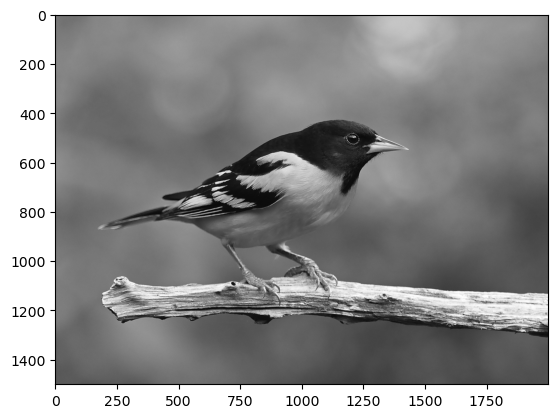

In [ ]:
from PIL import Image 
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh và chuyển sang ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')
# Chuyển ảnh sang mảng ndarray
iml = np.asarray(img)
# Tìm giá trị pixel lớn nhất và nhỏ nhất trong ảnh
b = iml.max()
a = iml.min()
print(a, b)
# Chuyển mảng iml sang kiểu float
c = iml.astype(float)
# Thực hiện biến đổi giãn tương phản (contrast stretching)
im2 = 255 * (c - a) / (b - a)
# Chuyển mảng im2 thành ảnh để hiển thị
im3 = Image.fromarray(im2)
# Hiển thị ảnh gốc và ảnh sau khi tăng tương phản
img.show()
im3.show()
plt.imshow(im3)
plt.show()


1.6 Biến đổi

1.6.1 Biến đổi ảnh với Fast Fourier

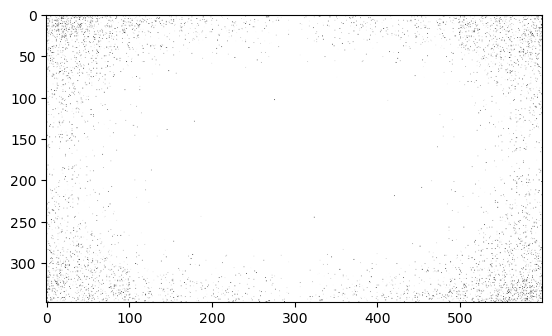

In [ ]:
from PIL import Image 
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh và chuyển sang ảnh xám (grayscale)
img = Image.open('pagoda.jpg').convert('L')
# Chuyển ảnh thành mảng ndarray
iml = np.asarray(img)
# Thực hiện biến đổi Fourier nhanh (FFT)
c = abs(scipy.fftpack.fft2(iml))
# Dịch chuyển ảnh phổ Fourier để tần số thấp nằm ở giữa
d = scipy.fftpack.fftshift(c)
d.astype(float)
# Chuyển mảng d (phổ tần số) thành ảnh để hiển thị
im3 = Image.fromarray(d)
# Hiển thị ảnh gốc và ảnh phổ tần số
img.show()
im3.show()
plt.imshow(im3)
plt.show()


1.6.2 Lọc ảnh trong miền tần suất

Butterworth Lowpass Filter

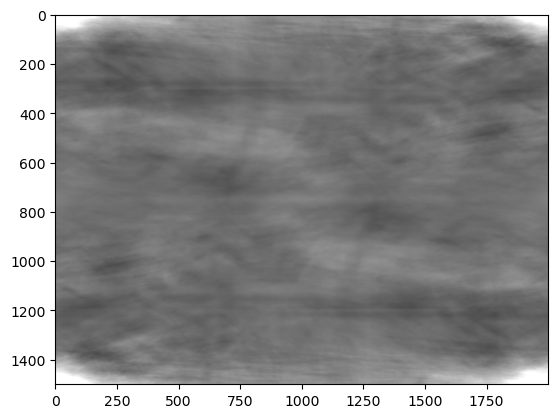

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh và chuyển sang ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')
# Chuyển ảnh thành mảng ndarray
iml = np.asarray(img)
# Thực hiện biến đổi Fourier nhanh (FFT)
c = abs(scipy.fftpack.fft2(iml))
# Dịch chuyển phổ Fourier để đưa tần số thấp vào giữa ảnh
d = scipy.fftpack.fftshift(c)
# Lấy kích thước ảnh
M = d.shape[0]
N = d.shape[1]
# Khởi tạo bộ lọc H với tất cả giá trị là 1
H = np.ones((M, N))

# Xác định tâm ảnh
center1 = M / 2
center2 = N / 2
d_0 = 30.0  # Bán kính cắt (cut-off radius)
t1 = 1      # Bậc của bộ lọc thông thấp Butterworth (BLPF)
t2 = 2 * t1

# Tính bộ lọc Butterworth thông thấp (Lowpass Filter)
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > 0.0:
            H[i, j] = 1 / (1 + (r / d_0)**t1)

# Chuyển H sang kiểu float và định dạng ảnh
H = H.astype(float)
H = Image.fromarray(H)
# Áp dụng bộ lọc H vào phổ ảnh
con = d * H
# Biến đổi ngược Fourier để lấy ảnh sau khi lọc
e = abs(scipy.fftpack.ifft2(con))
# Chuyển ảnh về kiểu float
e = e.astype(float)
im3 = Image.fromarray(e)

# Hiển thị ảnh gốc và ảnh sau khi lọc
img.show()
im3.show()
plt.imshow(im3)
plt.show()


Buttterworth highpass Filter

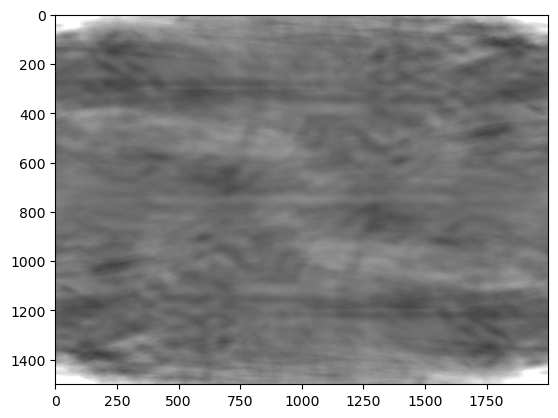

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.fftpack

# Mở ảnh và chuyển sang ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')
# Chuyển ảnh sang mảng ndarray
iml = np.asanyarray(img)
# Thực hiện biến đổi Fourier nhanh (FFT)
c = abs(scipy.fftpack.fft2(iml))
# Dịch chuyển ảnh phổ Fourier để tần số thấp nằm ở giữa
d = scipy.fftpack.fftshift(c)
# Khởi tạo các biến cho bộ lọc tích chập
M = d.shape[0]
N = d.shape[1]
# H được định nghĩa và khởi tạo các giá trị bằng 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  # Bán kính cắt (cut-off radius)
tl = 1      # Bậc của bộ lọc thông thấp Butterworth (BLPF)
t2 = 2 * tl

# Định nghĩa hàm tích chập cho BLPF
for i in range(1, M):
    for j in range(1, N):
        rl = (i - center1)**2 + (j - center2)**2
        # Tính khoảng cách Euclid từ tâm ảnh
        r = math.sqrt(rl)
        # Sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**tl)

# Áp dụng bộ lọc vào ảnh phổ
con = d * H
# Tính biên độ của ảnh sau khi biến đổi Fourier ngược
e = abs(scipy.fftpack.ifft2(con))
# Chuyển từ ndarray sang ảnh
e = e.astype(float)
im3 = Image.fromarray(e)

# Hiển thị ảnh gốc và ảnh sau lọc
img.show()
im3.show()
plt.imshow(im3)
plt.show()
